# Data Analysis
Prepared by: Hieng-

In [1]:
data_path = "/Users/maohieng/cadt/master/cadt_tts/phanet/tacotron2_khmer/km_kh_female"

In [2]:
import os
import pandas as pd

In [11]:
def metadata_processing(data_path) -> tuple[pd.DataFrame, list]:
    import wave
    wavs = f"{data_path}/wavs"
    # Read tsv file
    txts = f"{data_path}/line_index.tsv"
    with open(txts, 'r', encoding='utf-8') as f:
        lines = f.readlines()

    not_found_files = []
    md = []

    for line in lines:
        parts = line.strip().split('\t\t')
        filename = parts[0]+".wav"
        speaker = parts[0].split('_')[1]
        text = parts[1]
        # Calculate duration
        wav_path = os.path.join(data_path, "wavs", filename)
        try:
            with wave.open(wav_path, 'r') as wav_file:
                frames = wav_file.getnframes()
                rate = wav_file.getframerate()
                duration = frames / float(rate)
                wav_file.close()
        except FileNotFoundError:
            not_found_files.append(filename)
            continue

        # duration in seconds with 3 decimal places
        duration = round(duration, 3)

        # Append to metadata DataFrame
        md.append({"filename": filename, 
                   "text": text, 
                   "duration": duration, 
                   "sampling_rate": rate, 
                   "speaker": speaker})
    
    metadata = pd.DataFrame(md)
    return metadata, not_found_files

In [25]:
# check if metadata.csv exists in the current directory
# if os.path.exists("metadata.csv"):
#     metadata = pd.read_csv("metadata.csv", encoding='utf-8', sep='\t')
# else:
metadata, not_found_files = metadata_processing(data_path)
metadata.to_csv("metadata.tsv", index=False, encoding='utf-8', sep='\t')
if not_found_files:
    print(f"Warning: The following files were not found: {not_found_files}")

In [13]:
print(metadata.head())

                  filename                                               text  \
0  khm_0308_0011865648.wav  ស្ពាន កំពង់ ចម្លង អ្នកលឿង នៅ ព្រៃវែង ជា ស្ពាន ...   
1  khm_0308_0032157149.wav  ភ្លើង កំពុង ឆាប ឆេះ ផ្ទះ ប្រជា ពលរដ្ឋ នៅ សង្កា...   
2  khm_0308_0038959268.wav  អ្នក សុំ ទាន ដេក ប្រកាច់ ម្នាក់ ឯង ក្បែរ ខ្លោង...   
3  khm_0308_0054635313.wav  ស្ករ ត្នោត ដែល មាន គុណភាព ល្អ ផលិត នៅ ខេត្ត កំ...   
4  khm_0308_0055735195.wav         ភ្នំបាខែង មាន កម្ពស់ តែ ចិត សិប ម៉ែត្រ សោះ   

   duration  sampling_rate speaker  
0     6.997          48000    0308  
1     4.864          48000    0308  
2     5.888          48000    0308  
3     4.352          48000    0308  
4     3.584          48000    0308  


## Text Analysis

In [37]:
from collections import Counter

def word_count(texts):
    c = Counter()
    for text in texts:
        c.update(text.split())
    return c

In [38]:
# word count
word_count = word_count(metadata['text'])
print(f"Word Count: {sum(word_count.values())}")
print(f"Unique Words: {len(word_count)}")
print(f"Most Common Words: {word_count.most_common(10)}")

Word Count: 26179
Unique Words: 4347
Most Common Words: [('ជា', 698), ('នៅ', 658), ('មាន', 497), ('បាន', 438), ('ការ', 255), ('និង', 247), ('ប្រទេស', 244), ('ក្នុង', 239), ('ទៅ', 228), ('មួយ', 212)]


In [ ]:
# Create a vocabulary from the text data
vocab = set()
for text in metadata['text']:
    vocab.update(set(text))
vocab = sorted(vocab)
vocab_size = len(vocab)
print(f"Vocabulary Size: {vocab_size}")
print(f"Vocabulary: {vocab}")

Vocabulary Size: 71
Vocabulary: [' ', 'ក', 'ខ', 'គ', 'ឃ', 'ង', 'ច', 'ឆ', 'ជ', 'ឈ', 'ញ', 'ដ', 'ឋ', 'ឌ', 'ឍ', 'ណ', 'ត', 'ថ', 'ទ', 'ធ', 'ន', 'ប', 'ផ', 'ព', 'ភ', 'ម', 'យ', 'រ', 'ល', 'វ', 'ស', 'ហ', 'ឡ', 'អ', 'ឥ', 'ឧ', 'ឪ', 'ឫ', 'ឬ', 'ឭ', 'ឮ', 'ឯ', 'ឱ', 'ា', 'ិ', 'ី', 'ឹ', 'ឺ', 'ុ', 'ូ', 'ួ', 'ើ', 'ឿ', 'ៀ', 'េ', 'ែ', 'ៃ', 'ោ', 'ៅ', 'ំ', 'ះ', 'ៈ', '៉', '៊', '់', '៌', '៍', '៎', '៏', '័', '្']


In [39]:
def char_count(texts):
    counter = Counter()
    for text in texts:
        counter.update(text)
    return counter

In [40]:
chars = char_count(metadata['text'])
print(f"Character Count: {sum(chars.values())}")
print(f"Unique Characters: {len(chars)}")
print(f"All Characters: {chars}")

Character Count: 146460
Unique Characters: 71
All Characters: Counter({' ': 23512, '្': 11316, 'ា': 10555, 'ន': 7221, 'រ': 7133, 'ក': 5543, 'ស': 5490, 'ប': 4846, 'ម': 4764, 'ត': 3913, 'ង': 3736, 'ល': 3379, 'ិ': 2770, 'ី': 2701, 'ុ': 2691, '់': 2658, 'ទ': 2426, 'យ': 2344, 'ព': 2328, 'េ': 2307, 'ជ': 2295, 'ំ': 2034, 'ច': 1981, 'ូ': 1878, 'វ': 1864, 'ដ': 1740, 'អ': 1662, 'គ': 1543, 'ែ': 1420, 'ហ': 1320, 'ើ': 1204, 'ោ': 1083, 'ៅ': 1081, 'ណ': 1063, '៉': 1014, 'ខ': 994, 'ញ': 949, 'ះ': 808, 'ួ': 807, 'ភ': 786, 'ធ': 779, '៊': 733, 'ផ': 647, 'ថ': 647, 'ៀ': 504, 'ឹ': 466, '័': 451, 'ៃ': 418, 'ឡ': 342, 'ឆ': 279, 'ឌ': 268, 'ឈ': 236, '៍': 227, 'ឋ': 223, 'ឺ': 201, 'ឿ': 144, 'ឃ': 135, '៏': 130, 'ឱ': 108, 'ៈ': 104, 'ឥ': 53, 'ឯ': 50, 'ឧ': 41, '៌': 38, 'ឬ': 21, 'ឍ': 18, 'ឫ': 14, 'ឪ': 11, 'ឮ': 9, '៎': 3, 'ឭ': 1})


## Speaker Analysis

In [18]:
# Count speaker distribution
print("Total Speakers:", metadata['speaker'].nunique())
speaker_count = metadata['speaker'].value_counts()
print("Speaker Distribution:")
print(speaker_count)

Total Speakers: 16
Speaker Distribution:
speaker
6753    863
7548    265
3154    263
2499    230
1443    213
6444    160
8029    125
1161    117
4119    104
0995     98
1728     90
6438     84
3444     80
0308     77
0877     77
3116     60
Name: count, dtype: int64


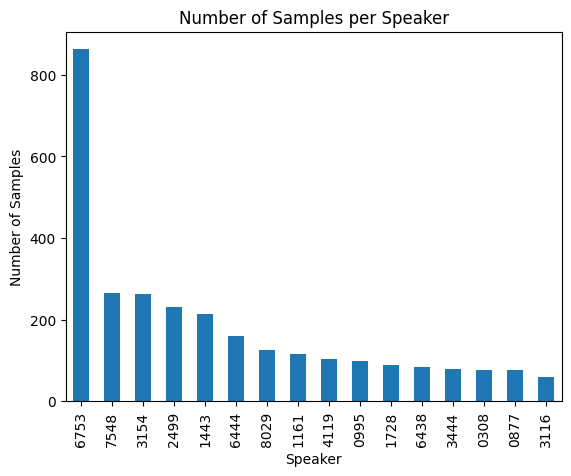

In [17]:
# Draw number of samples per speaker
import matplotlib.pyplot as plt
speaker_count.plot(kind='bar')
plt.title("Number of Samples per Speaker")
plt.xlabel("Speaker")
plt.ylabel("Number of Samples")
plt.show()

In [20]:
# Calculate total duration of a speaker
total_duration_per_speaker = metadata.groupby('speaker')['duration'].sum().sort_values(ascending=False)
print("Total Duration per Speaker (in seconds):")
print(total_duration_per_speaker)

Total Duration per Speaker (in seconds):
speaker
6753    4147.369
7548    1232.894
2499    1217.106
1443    1062.486
3154    1018.541
6444     710.908
1161     664.830
0995     633.172
8029     578.301
4119     530.140
1728     468.196
0877     467.051
6438     431.790
3116     383.577
3444     369.835
0308     364.202
Name: duration, dtype: float64


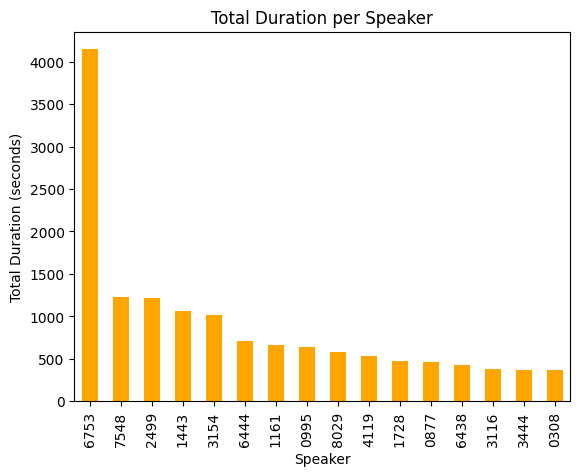

In [22]:
# Plot the total duration per speaker
total_duration_per_speaker.plot(kind='bar', color='orange')
plt.title("Total Duration per Speaker")
plt.xlabel("Speaker")
plt.ylabel("Total Duration (seconds)")
plt.show()

In [ ]:
# Take the speaker with the maximum total duration to calculate in hours
total_duration_per_speaker.max() / 3600  # convert seconds to hours

np.float64(1.1520469444444443)

## Single Speaker Dataset

In [24]:
# Create a pandas DataFrame for a single speaker dataset that has the maximum total duration
top_speaker = total_duration_per_speaker.idxmax()
single_speaker_metadata = metadata[metadata['speaker'] == top_speaker].reset_index(drop=True)
print(f"Single Speaker Dataset for Speaker: {top_speaker}")

Single Speaker Dataset for Speaker: 6753


In [26]:
# Save single speaker metadata to tsv
single_speaker_metadata.to_csv("single_speaker_metadata.tsv", index=False, encoding='utf-8', sep='\t')

In [32]:
print(single_speaker_metadata.head())

                  filename                                              text  \
0  khm_6753_0006275890.wav                      តា ផឿង មាន ទម្ងន់ មួយ រយ ផោន   
1  khm_6753_0007264957.wav             ពុទ្ធ ប្រវត្តិ មាន ប៉ុន្មាន ដំណាក់កាល   
2  khm_6753_0010906676.wav  បើ យើង ស្គាល់ កូអ័រដោណេ វា យើង អាច នឹង រក វា ឃើញ   
3  khm_6753_0014350464.wav                    ឆោម ពុនយ៉ុង សម្រេចចិត្ត ទៅ បួស   
4  khm_6753_0014442614.wav              គ្រឹះស្ថាន អង្គរ មីក្រូ ហិរញ្ញ វត្ថុ   

   duration  sampling_rate speaker  
0     3.413          48000    6753  
1     3.925          48000    6753  
2     4.437          48000    6753  
3     3.499          48000    6753  
4     4.437          48000    6753  


### Single Speaker Analysis

In [33]:
single_speaker_chars = char_count(single_speaker_metadata['text'])
print(f"Character Count: {sum(single_speaker_chars.values())}")
print(f"Unique Characters: {len(single_speaker_chars)}")
print(f"All Characters: {single_speaker_chars}")

Character Count: 37896
Unique Characters: 69
All Characters: Counter({' ': 5906, '្': 3107, 'ា': 2655, 'រ': 1860, 'ន': 1851, 'ក': 1485, 'ស': 1445, 'ប': 1266, 'ម': 1246, 'ត': 999, 'ង': 916, 'ល': 791, 'ិ': 763, 'ុ': 726, 'ី': 714, '់': 681, 'ទ': 633, 'ព': 628, 'េ': 606, 'ជ': 571, 'យ': 557, 'វ': 541, 'ច': 501, 'ំ': 482, 'ូ': 478, 'អ': 469, 'ហ': 431, 'គ': 409, 'ដ': 408, 'ែ': 361, 'ើ': 319, 'ោ': 269, 'ញ': 268, 'ណ': 261, '៉': 256, 'ធ': 244, 'ៅ': 244, 'ខ': 243, 'ះ': 223, '៊': 214, 'ភ': 209, 'ួ': 185, 'ថ': 169, 'ផ': 156, 'ឹ': 126, '័': 125, 'ៀ': 118, 'ៃ': 116, 'ឡ': 83, 'ឺ': 76, 'ឆ': 68, 'ឈ': 68, 'ឌ': 60, 'ឋ': 58, '៍': 53, 'ឿ': 34, 'ឃ': 33, '៏': 31, 'ៈ': 19, 'ឱ': 18, 'ឥ': 17, 'ឯ': 12, 'ឬ': 9, 'ឧ': 8, '៌': 5, 'ឮ': 4, 'ឪ': 4, 'ឍ': 3, '៎': 2})


In [34]:
for c in chars:
    if c not in single_speaker_chars:
        print(f"Character '{c}' is missing in single speaker dataset.")

Character 'ឫ' is missing in single speaker dataset.
Character 'ឭ' is missing in single speaker dataset.


In [42]:
single_speaker_word_count = Counter()
for text in single_speaker_metadata['text']:
    single_speaker_word_count.update(text.split())
print(f"Word Count: {sum(single_speaker_word_count.values())}")
print(f"Unique Words: {len(single_speaker_word_count)}")
print(f"Most Common Words: {single_speaker_word_count.most_common(10)}")

Word Count: 6696
Unique Words: 2138
Most Common Words: [('ជា', 182), ('នៅ', 147), ('មាន', 116), ('បាន', 89), ('និង', 70), ('អ្នក', 69), ('ប្រទេស', 68), ('ក្នុង', 66), ('កម្ពុជា', 63), ('ការ', 56)]
